Before we get started, a couple of reminders to keep in mind when using iPython notebooks:

- Remember that you can see from the left side of a code cell when it was last run if there is a number within the brackets.
- When you start a new notebook session, make sure you run all of the cells up to the point where you last left off. Even if the output is still visible from when you ran the cells in your previous session, the kernel starts in a fresh state so you'll need to reload the data, etc. on a new session.
- The previous point is useful to keep in mind if your answers do not match what is expected in the lesson's quizzes. Try reloading the data and run all of the processing steps one by one in order to make sure that you are working with the same variables and data that are at each quiz stage.

## Load Data from CSVs

In [1]:
import unicodecsv

def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)
    
enrollments = read_csv('enrollments.csv')
daily_engagement = read_csv('daily_engagement.csv')
#daily_engagement_full = read_csv('daily_engagement_full.csv')
project_submissions = read_csv('project_submissions.csv')

print enrollments[0]
print daily_engagement[0]
#print daily_engagement_full[0]
print project_submissions[0]

{u'status': u'canceled', u'is_udacity': u'True', u'is_canceled': u'True', u'join_date': u'2014-11-10', u'account_key': u'448', u'cancel_date': u'2015-01-14', u'days_to_cancel': u'65'}
{u'lessons_completed': u'0.0', u'num_courses_visited': u'1.0', u'total_minutes_visited': u'11.6793745', u'projects_completed': u'0.0', u'acct': u'0', u'utc_date': u'2015-01-09'}
{u'lesson_key': u'3176718735', u'processing_state': u'EVALUATED', u'account_key': u'256', u'assigned_rating': u'UNGRADED', u'completion_date': u'2015-01-16', u'creation_date': u'2015-01-14'}


## Fixing Data Types

In [2]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

In [3]:
# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [4]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [5]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

## Raising questions about the data

**Mine**
1. Most visited courses (requires full engagement data)
2. Active users over time
3. Most productive day of the week (avg minutes / compl. projects / compl. lessons)
4. How enrolled students differ from students that cancelled their enrollment, project-wise? (% of reject

## Problems in the Data

In [6]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".
for engagement_record in daily_engagement:
    engagement_record['account_key'] = engagement_record['acct']
    del engagement_record['acct']    

Note when running the above cells that we are actively changing the contents of our data variables. If you try to run these cells multiple times in the same session, an error will occur.

## Investigating the Data

In [8]:
def get_unique_students(data):
    unique_students = set()
    for entry in data:
        unique_students.add(entry['account_key'])
    return unique_students

In [9]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.

unique_enrolled_students = get_unique_students(enrollments)
print 'total enrollment students:', len(enrollments), '(unique =', len(unique_enrolled_students), ')'

unique_engagement_students = get_unique_students(daily_engagement)
print 'total engagement students:', len(daily_engagement), '(unique =', len(unique_engagement_students), ')'

unique_project_submitters = get_unique_students(project_submissions)
print 'total project submitters:', len(project_submissions), '(unique =', len(unique_project_submitters), ')'


total enrollment students: 1640 (unique = 1302 )
total engagement students: 136240 (unique = 1237 )
total project submitters: 3642 (unique = 743 )


In [10]:
daily_engagement[0]['account_key']

u'0'

## Missing Engagement Records

In [13]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.
no_engagement_enrollments = []
for enrollment in enrollments:
    studentId = enrollment['account_key']
    if studentId not in unique_engagement_students:
        no_engagement_enrollments.append(enrollment)

print no_engagement_enrollments[0]

{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 12, 0, 0), u'account_key': u'1219', u'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), u'days_to_cancel': 0}


## Checking for More Problem Records

In [14]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.

ghost_enrollments = []
for enrollment in no_engagement_enrollments:
    if enrollment['cancel_date'] != enrollment['join_date'] or enrollment['days_to_cancel'] != 0:
        ghost_enrollments.append(enrollment)
    
#len(ghost_enrollments) # 3
ghost_enrollments

[{u'account_key': u'1304',
  u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0),
  u'days_to_cancel': 59,
  u'is_canceled': True,
  u'is_udacity': True,
  u'join_date': datetime.datetime(2015, 1, 10, 0, 0),
  u'status': u'canceled'},
 {u'account_key': u'1304',
  u'cancel_date': datetime.datetime(2015, 6, 17, 0, 0),
  u'days_to_cancel': 99,
  u'is_canceled': True,
  u'is_udacity': True,
  u'join_date': datetime.datetime(2015, 3, 10, 0, 0),
  u'status': u'canceled'},
 {u'account_key': u'1101',
  u'cancel_date': None,
  u'days_to_cancel': None,
  u'is_canceled': False,
  u'is_udacity': True,
  u'join_date': datetime.datetime(2015, 2, 25, 0, 0),
  u'status': u'current'}]

## Tracking Down the Remaining Problems

In [15]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_account_keys = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_account_keys.add(enrollment['account_key'])
len(udacity_test_account_keys)

6

In [17]:
# Given some data with an account_key field, removes any records 
# corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_account_keys:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [20]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print 'non_udacity\t // all'
print len(non_udacity_enrollments), '\t\t//', len(enrollments)
print len(non_udacity_engagement), '\t\t//', len(daily_engagement)
print len(non_udacity_submissions), '\t\t//', len(project_submissions)

non_udacity	 //all
1622 		// 1640
135656 		// 136240
3634 		// 3642


## Refining the Question

In [21]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

# {6718273:2018-1-1, 
# 2193123:2017-12-31,
# 9182931:2018-06-06,
# ...}

paid_students = {}

for enrollment in non_udacity_enrollments:
    if enrollment['status'] != 'canceled' or enrollment['days_to_cancel'] > 7:
        account_key = enrollment['account_key']
        enrollment_date = enrollment['join_date']
        
        # Restrict to only the most recent student's enrollment
        if account_key not in paid_students or enrollment_date > paid_students[account_key]:
            paid_students[account_key] = enrollment_date
    
len(paid_students)

995

## Getting Data from First Week

#### Important: enrollments' account_keys ARE NOT UNIQUE!

In [22]:
enrollments_account_keys = [enr['account_key'] for enr in non_udacity_enrollments]
print len(non_udacity_enrollments)
print len(enrollments_account_keys)
print len(set(enrollments_account_keys))

    

1622
1622
1296


In [23]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

In [24]:
daily_engagement[1]

{'account_key': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 2,
 u'projects_completed': 0,
 u'total_minutes_visited': 37.2848873333,
 u'utc_date': datetime.datetime(2015, 1, 10, 0, 0)}

In [25]:
ghost_enrollments[0]

{u'account_key': u'1304',
 u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0),
 u'days_to_cancel': 59,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2015, 1, 10, 0, 0),
 u'status': u'canceled'}

In [26]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.
paid_engagement_in_first_week = []

for engagement in non_udacity_engagement:
    if engagement['account_key'] in paid_students:
        join_date = paid_students[engagement['account_key']]
        if within_one_week(join_date, engagement['utc_date']):
            paid_engagement_in_first_week.append(engagement)
len(paid_engagement_in_first_week)

6919

In [27]:
# Declaring variables used in the course's answer. Just in case they get mentioned later
def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students: 
            new_data.append(data_point) 
    return new_data

paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

In [38]:
# LESSON 20
for engagement_record in paid_engagement:
    if engagement_record['num_courses_visited'] > 0:
        engagement_record['has_visited'] = 1
    else:
        engagement_record['has_visited'] = 0

## Exploring Student Engagement

In [28]:
from collections import defaultdict

# Returns a list of dicts with 'key_name' values as keys and a list 
# of data entries with 'key_name' value == key as the value for each key
def group_by_key(data, key_name):
    grouped_data = defaultdict(list)
    for data_entry in data:
        group = data_entry[key_name]
        grouped_data[group].append(data_entry)
    return grouped_data

In [30]:
# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = group_by_key(data=paid_engagement_in_first_week, key_name='account_key')

In [31]:
def sum_grouped_items(grouped_data, field_name):
    summed_data = {}
    for key, data_points in grouped_data.iteritems():
        total = 0
        for data_entry in data_points:
            total += data_entry[field_name]
        summed_data[key] = total
    return summed_data
        

# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = sum_grouped_items(engagement_by_account, 'total_minutes_visited')


Populating the interactive namespace from numpy and matplotlib
Mean: 306.70832675342825
Standard deviation: 412.99693340852957
Minimum: 0.0
Maximum: 3564.7332644989997


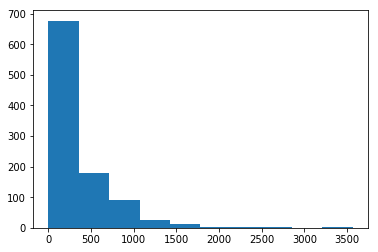

In [74]:
%pylab inline

import matplotlib.pyplot as plt
import numpy as np

def describe_data(data_entries):
    print 'Mean:', np.mean(data_entries)
    print 'Standard deviation:', np.std(data_entries)
    print 'Minimum:', np.min(data_entries)
    print 'Maximum:', np.max(data_entries)
    plt.hist(data_entries)

# Summarize the data about minutes spent in the classroom
total_minutes = describe_data(total_minutes_by_account.values())

## Debugging Data Analysis Code

In [33]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.

max_minutes_outliers = \
{acc: minutes for acc, minutes in total_minutes_by_account.iteritems() if minutes >= 60*24*7}

len(max_minutes_outliers) # 1

max_minutes_outliers

{}

In [34]:
str(paid_enrollments[0]['account_key'])

'429'

In [35]:
paid_enrollments[0] # Thats a list of dicts

max_minutes_outlier_enrollments = \
[enr for enr in paid_enrollments if str(enr['account_key']) == '108']

In [36]:
max_minutes_outlier_enrollments

[{u'account_key': u'108',
  u'cancel_date': datetime.datetime(2015, 4, 20, 0, 0),
  u'days_to_cancel': 103,
  u'is_canceled': True,
  u'is_udacity': False,
  u'join_date': datetime.datetime(2015, 1, 7, 0, 0),
  u'status': u'canceled'},
 {u'account_key': u'108',
  u'cancel_date': datetime.datetime(2015, 5, 14, 0, 0),
  u'days_to_cancel': 24,
  u'is_canceled': True,
  u'is_udacity': False,
  u'join_date': datetime.datetime(2015, 4, 20, 0, 0),
  u'status': u'canceled'}]

## Lessons Completed in First Week

In [40]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

total_lessons_by_account = \
sum_grouped_items(grouped_data=engagement_by_account, field_name='lessons_completed')

In [41]:
total_lessons_by_account

{u'0': 1,
 u'1': 0,
 u'10': 0,
 u'100': 1,
 u'1000': 1,
 u'1001': 0,
 u'1002': 0,
 u'1007': 0,
 u'1009': 0,
 u'101': 0,
 u'1011': 0,
 u'1013': 0,
 u'1014': 10,
 u'1015': 0,
 u'1019': 0,
 u'102': 0,
 u'1022': 0,
 u'1028': 0,
 u'1029': 0,
 u'103': 7,
 u'1030': 2,
 u'1031': 0,
 u'1032': 0,
 u'1033': 9,
 u'1036': 0,
 u'1038': 0,
 u'104': 2,
 u'1040': 0,
 u'1042': 0,
 u'1048': 0,
 u'1049': 0,
 u'105': 0,
 u'1050': 1,
 u'1052': 0,
 u'1053': 0,
 u'1054': 0,
 u'1055': 0,
 u'1056': 5,
 u'1058': 0,
 u'106': 0,
 u'1060': 1,
 u'1062': 0,
 u'1066': 0,
 u'1067': 0,
 u'107': 1,
 u'1070': 16,
 u'1071': 0,
 u'1072': 0,
 u'1073': 0,
 u'1074': 0,
 u'1075': 0,
 u'1077': 0,
 u'108': 0,
 u'1080': 0,
 u'1081': 0,
 u'1082': 1,
 u'1087': 1,
 u'1088': 0,
 u'1089': 0,
 u'109': 3,
 u'1090': 0,
 u'1094': 1,
 u'1095': 0,
 u'1096': 7,
 u'1098': 1,
 u'1099': 1,
 u'11': 0,
 u'110': 9,
 u'1102': 0,
 u'1103': 0,
 u'1107': 0,
 u'111': 1,
 u'1110': 0,
 u'1111': 0,
 u'1113': 0,
 u'1115': 0,
 u'1117': 0,
 u'1118': 1,
 u'112

In [42]:
describe_data(total_lessons_by_account.values())


Mean: 1.636180904522613
Standard deviation: 3.002561299829423
Minimum: 0
Maximum: 36


## Number of Visits in First Week

In [43]:
paid_engagement_in_first_week[0]

{'account_key': u'0',
 'has_visited': 1,
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [44]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.

# Add has_visited

days_visited_by_account = sum_grouped_items(engagement_by_account, 'has_visited')
describe_data(days_visited_by_account.values())

Mean: 2.8673366834170855
Standard deviation: 2.2551980029196814
Minimum: 0
Maximum: 7


In [45]:
len(days_visited_by_account)

995

## Splitting out Passing Students

In [46]:
project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

In [47]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']

passing_engagement = []
non_passing_engagement = []

for engagement in paid_engagement_in_first_week:
    passed = False
    acc = engagement['account_key']
    for submission in [s for s in project_submissions if s['account_key'] == acc \
                       and s['lesson_key'] in subway_project_lesson_keys]:
        if submission['assigned_rating'] in ('PASSED', 'DISTINCTION'):
            passed = True
            break
    if passed:
        passing_engagement.append(engagement)
    else:
        non_passing_engagement.append(engagement)


In [48]:
print len(passing_engagement)
print len(non_passing_engagement)

4527
2392


In [49]:
# N of students who passed in the subway project
len(set([eng['account_key'] for eng in passing_engagement]))

647

## Comparing the Two Student Groups

In [50]:
passing_students = set([eng['account_key'] for eng in passing_engagement])
non_passing_students = set([eng['account_key'] for eng in non_passing_engagement])

## First week ##

Minutes:

Students who pass:
Mean: 394.58604648350865
Standard deviation: 448.4995193265521
Minimum: 0.0
Maximum: 3564.7332644989997

Students who don't:
Mean: 143.32647426675584
Standard deviation: 269.5386190114951
Minimum: 0.0
Maximum: 1768.5227493319999


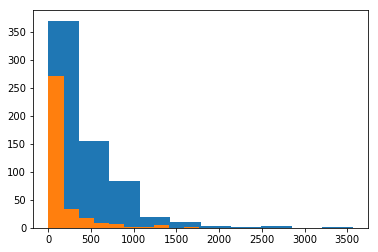

In [67]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).

engagement_by_passing_students = group_by_key(passing_engagement, 'account_key')
engagement_by_non_passing_students = group_by_key(non_passing_engagement, 'account_key')

minutes_of_passing_students = sum_grouped_items(engagement_by_passing_students, 'total_minutes_visited').values()
minutes_of_non_passing_students = sum_grouped_items(engagement_by_non_passing_students, 'total_minutes_visited').values()

print '## First week ##\n\nMinutes:'

print '\nStudents who pass:'
describe_data(minutes_of_passing_students)
print '\nStudents who don\'t:'
describe_data(minutes_of_non_passing_students)

Lessons completed:

Students who pass:
Mean: 2.052550231839258
Standard deviation: 3.1422270555779344
Minimum: 0
Maximum: 36

Students who don't:
Mean: 0.8620689655172413
Standard deviation: 2.5491599418312028
Minimum: 0
Maximum: 27


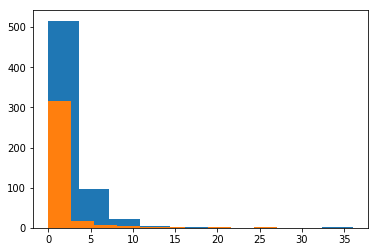

In [68]:
lessons_of_passing_students = sum_grouped_items(engagement_by_passing_students, 'lessons_completed').values()
lessons_of_non_passing_students = sum_grouped_items(engagement_by_non_passing_students, 'lessons_completed').values()

print 'Lessons completed:'

print '\nStudents who pass:'
describe_data(lessons_of_passing_students)
print '\nStudents who don\'t:'
describe_data(lessons_of_non_passing_students)

Days visiting courses:

Students who pass:
Mean: 3.384853168469861
Standard deviation: 2.2588214709184595
Minimum: 0
Maximum: 7

Students who don't:
Mean: 1.9051724137931034
Standard deviation: 1.9057314413619049
Minimum: 0
Maximum: 7


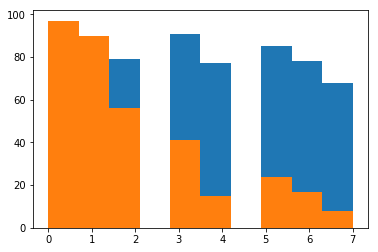

In [72]:
visits_of_passing_students = sum_grouped_items(engagement_by_passing_students, 'has_visited').values()
visits_of_non_passing_students = sum_grouped_items(engagement_by_non_passing_students, 'has_visited').values()

print 'Days visiting courses:'

print '\nStudents who pass:'
describe_data(visits_of_passing_students)
print '\nStudents who don\'t:'
describe_data(visits_of_non_passing_students)

## Making Histograms

(array([3., 2., 2., 1.]),
 array([1.  , 1.75, 2.5 , 3.25, 4.  ]),
 <a list of 4 Patch objects>)

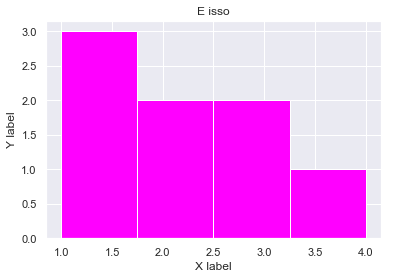

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

data = [1, 2, 1, 3, 3, 1, 4, 2]

sns.set(palette="muted")
plt.title("E isso")
plt.xlabel("X label")
plt.ylabel("Y label")
plt.hist(data, bins=len(set(data)), color='magenta')

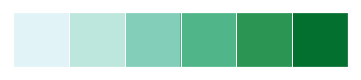

In [25]:
sns.palplot(sns.color_palette("BuGn"))

In [75]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.

# DONE


## Improving Plots and Sharing Findings

In [ ]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.